In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math
from statsmodels.tools.eval_measures import rmse

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [3]:
data=pd.read_csv('uber.csv')

In [4]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
data.shape

(200000, 9)

In [6]:
data.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')

In [7]:
cor=data.corr()
cor.fare_amount

Unnamed: 0           0.000589
fare_amount          1.000000
pickup_longitude     0.010457
pickup_latitude     -0.008481
dropoff_longitude    0.008986
dropoff_latitude    -0.011014
passenger_count      0.010150
Name: fare_amount, dtype: float64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [9]:
data=data.dropna()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199999 non-null  int64  
 1   key                199999 non-null  object 
 2   fare_amount        199999 non-null  float64
 3   pickup_datetime    199999 non-null  object 
 4   pickup_longitude   199999 non-null  float64
 5   pickup_latitude    199999 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    199999 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 15.3+ MB


In [11]:
data=data.drop(['Unnamed: 0'],axis=1)

In [12]:
data.pickup_datetime=pd.to_datetime(data.pickup_datetime)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                199999 non-null  object             
 1   fare_amount        199999 non-null  float64            
 2   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 3   pickup_longitude   199999 non-null  float64            
 4   pickup_latitude    199999 non-null  float64            
 5   dropoff_longitude  199999 non-null  float64            
 6   dropoff_latitude   199999 non-null  float64            
 7   passenger_count    199999 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 13.7+ MB


In [14]:
new_col=data
new_col['day']=data.pickup_datetime.dt.day
new_col['day_of_week']=data.pickup_datetime.dt.day_of_week
new_col['day_of_year']=data.pickup_datetime.dt.day_of_year
new_col['hour']=data.pickup_datetime.dt.hour
new_col['minite']=data.pickup_datetime.dt.minute
new_col['month']=data.pickup_datetime.dt.month

In [15]:
new_col.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,day_of_week,day_of_year,hour,minite,month
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,7,3,127,19,52,5
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,17,4,198,20,4,7
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,24,0,236,21,45,8
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,26,4,177,8,22,6
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,28,3,240,17,47,8


In [16]:
new_col["year"]=data.pickup_datetime.dt.year

In [17]:
new_col.year.value_counts()

2012    32396
2011    31945
2013    31194
2009    30536
2010    30194
2014    29968
2015    13766
Name: year, dtype: int64

In [18]:
new_col.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,day_of_week,day_of_year,hour,minite,month,year
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,7,3,127,19,52,5,2015
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,17,4,198,20,4,7,2009
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,24,0,236,21,45,8,2009
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,26,4,177,8,22,6,2009
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,28,3,240,17,47,8,2014


In [19]:
origin = [new_col.pickup_latitude, new_col.pickup_longitude]  
dista = [new_col.dropoff_latitude,new_col.dropoff_longitude]

In [20]:
from geopy import distance

In [21]:
def distance_transform(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range(len(longitude1)):
        long1,lati1,long2,lati2 = map(math.radians,[longitude1[pos],latitude1[pos],longitude2[pos],latitude2[pos]])
        dist_long = long2 - long1
        dist_lati = lati2 - lati1
        a = math.sin(dist_lati/2)**2 + math.cos(lati1) * math.cos(lati2) * math.sin(dist_long/2)**2
        c = 2 * math.asin(np.sqrt(a))*6371
        travel_dist.append(c)
       
    return travel_dist

In [22]:
new_col['dist_travel_km'] = distance_transform(new_col['pickup_longitude'].to_numpy(),
                                                new_col['pickup_latitude'].to_numpy(),
                                                new_col['dropoff_longitude'].to_numpy(),
                                                new_col['dropoff_latitude'].to_numpy()
                                              )

In [23]:
new_col

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,day_of_week,day_of_year,hour,minite,month,year,dist_travel_km
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,7,3,127,19,52,5,2015,1.683323
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,17,4,198,20,4,7,2009,2.457590
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,24,0,236,21,45,8,2009,5.036377
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,26,4,177,8,22,6,2009,1.661683
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,28,3,240,17,47,8,2014,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,28,6,302,10,49,10,2012,0.112210
199996,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,14,4,73,1,9,3,2014,1.875050
199997,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,29,0,180,0,42,6,2009,12.850319
199998,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,20,2,140,14,56,5,2015,3.539715


In [24]:
cor=new_col.corr()
cor.fare_amount

fare_amount          1.000000
pickup_longitude     0.010458
pickup_latitude     -0.008482
dropoff_longitude    0.008986
dropoff_latitude    -0.011014
passenger_count      0.010158
day                  0.001384
day_of_week          0.007508
day_of_year          0.023824
hour                -0.021463
minite              -0.008043
month                0.023813
year                 0.118331
dist_travel_km       0.024684
Name: fare_amount, dtype: float64

In [25]:
new_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                199999 non-null  object             
 1   fare_amount        199999 non-null  float64            
 2   pickup_datetime    199999 non-null  datetime64[ns, UTC]
 3   pickup_longitude   199999 non-null  float64            
 4   pickup_latitude    199999 non-null  float64            
 5   dropoff_longitude  199999 non-null  float64            
 6   dropoff_latitude   199999 non-null  float64            
 7   passenger_count    199999 non-null  int64              
 8   day                199999 non-null  int64              
 9   day_of_week        199999 non-null  int64              
 10  day_of_year        199999 non-null  int64              
 11  hour               199999 non-null  int64              
 12  minite             199999 non-

In [26]:
new_col=new_col.drop(["key",'pickup_datetime'],axis=1)

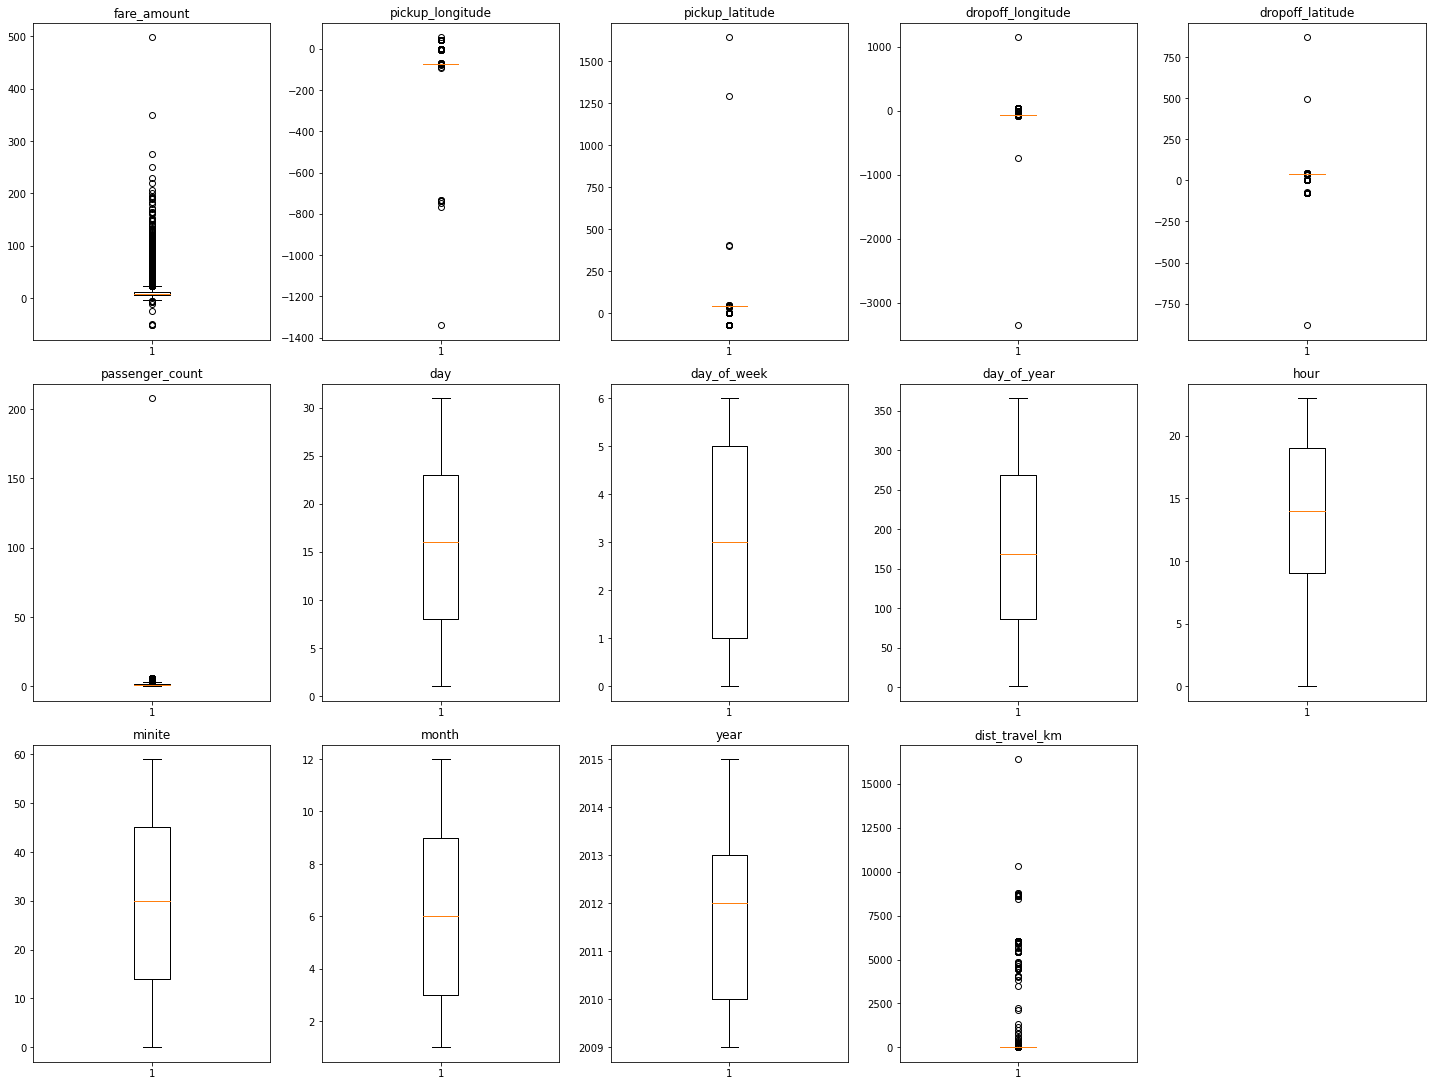

In [27]:
plt.figure(figsize=(20,30))
for i , variable in enumerate(new_col.select_dtypes(include=np.number)):
    plt.subplot(6,5,i+1)
    plt.boxplot(new_col[variable] , whis = 1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

In [28]:
new_col.iloc[: , 0::]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,day_of_week,day_of_year,hour,minite,month,year,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,7,3,127,19,52,5,2015,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,17,4,198,20,4,7,2009,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,24,0,236,21,45,8,2009,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,26,4,177,8,22,6,2009,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,28,3,240,17,47,8,2014,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,28,6,302,10,49,10,2012,0.112210
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,14,4,73,1,9,3,2014,1.875050
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,29,0,180,0,42,6,2009,12.850319
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,20,2,140,14,56,5,2015,3.539715


In [29]:
new_col.min()

fare_amount           -52.000000
pickup_longitude    -1340.648410
pickup_latitude       -74.015515
dropoff_longitude   -3356.666300
dropoff_latitude     -881.985513
passenger_count         0.000000
day                     1.000000
day_of_week             0.000000
day_of_year             1.000000
hour                    0.000000
minite                  0.000000
month                   1.000000
year                 2009.000000
dist_travel_km          0.000000
dtype: float64

In [30]:
new_col.max()

fare_amount            499.000000
pickup_longitude        57.418457
pickup_latitude       1644.421482
dropoff_longitude     1153.572603
dropoff_latitude       872.697628
passenger_count        208.000000
day                     31.000000
day_of_week              6.000000
day_of_year            366.000000
hour                    23.000000
minite                  59.000000
month                   12.000000
year                  2015.000000
dist_travel_km       16409.239135
dtype: float64

In [32]:
new_col

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,day_of_week,day_of_year,hour,minite,month,year,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,7,3,127,19,52,5,2015,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,17,4,198,20,4,7,2009,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,24,0,236,21,45,8,2009,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,26,4,177,8,22,6,2009,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,28,3,240,17,47,8,2014,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,28,6,302,10,49,10,2012,0.112210
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,14,4,73,1,9,3,2014,1.875050
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,29,0,180,0,42,6,2009,12.850319
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,20,2,140,14,56,5,2015,3.539715


In [33]:
new_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_longitude   199999 non-null  float64
 2   pickup_latitude    199999 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    199999 non-null  int64  
 6   day                199999 non-null  int64  
 7   day_of_week        199999 non-null  int64  
 8   day_of_year        199999 non-null  int64  
 9   hour               199999 non-null  int64  
 10  minite             199999 non-null  int64  
 11  month              199999 non-null  int64  
 12  year               199999 non-null  int64  
 13  dist_travel_km     199999 non-null  float64
dtypes: float64(6), int64(8)
memory usage: 22.9 MB


In [34]:
def outlier(df,col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    lower_wisker=q1-1.5*(q3-q1)
    upper_wisker=q3+1.5*(q3-q1)
    df[col]=np.clip(df[col],lower_wisker,upper_wisker,axis=1)
    return df


def treat_outliers(df, col):
    for c in col:
        df=outlier(df,col)
    return df

In [35]:
col_list=new_col.select_dtypes(include=np.number)
col_list

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,day_of_week,day_of_year,hour,minite,month,year,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,7,3,127,19,52,5,2015,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,17,4,198,20,4,7,2009,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,24,0,236,21,45,8,2009,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,26,4,177,8,22,6,2009,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,28,3,240,17,47,8,2014,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,28,6,302,10,49,10,2012,0.112210
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,14,4,73,1,9,3,2014,1.875050
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,29,0,180,0,42,6,2009,12.850319
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,20,2,140,14,56,5,2015,3.539715


In [36]:
new_col=treat_outliers(new_col,col_list.columns)

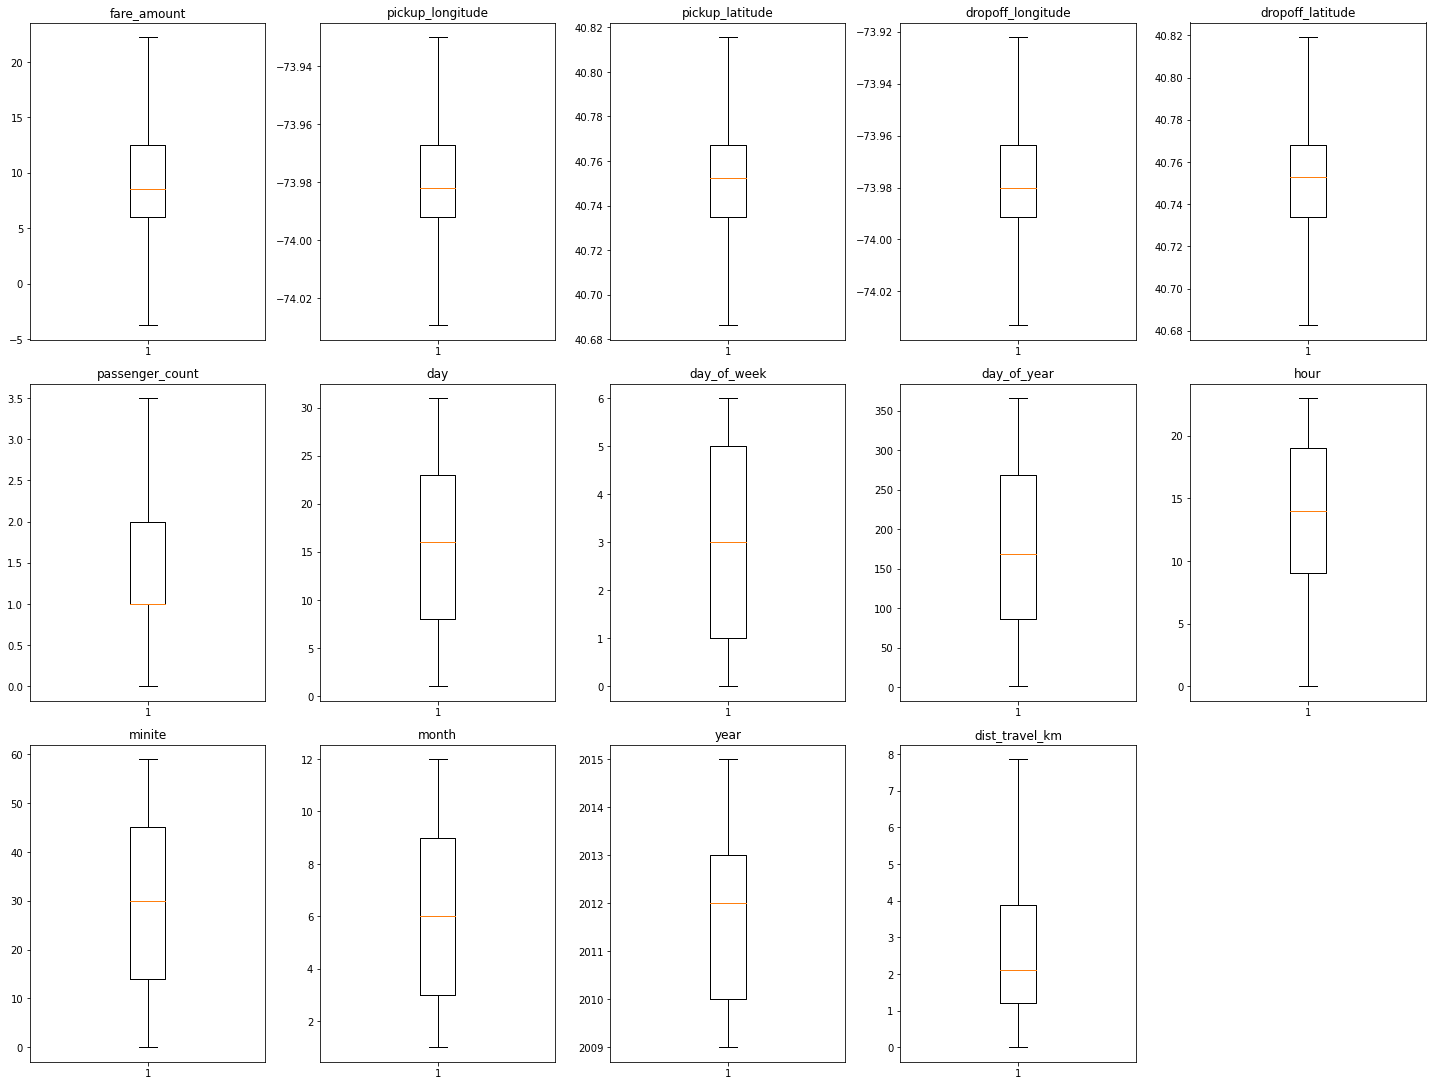

In [37]:
plt.figure(figsize=(20,30))
for i , variable in enumerate(new_col.select_dtypes(include=np.number)):
    plt.subplot(6,5,i+1)
    plt.boxplot(new_col[variable] , whis = 1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

In [38]:
y=new_col.fare_amount
x=new_col.drop(["fare_amount"],axis=1)

In [43]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.33)

In [44]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((133999, 13), (133999,), (66000, 13), (66000,))

In [46]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [47]:
model_lr=lr.fit(xtrain,ytrain)
model_lr.score(xtrain,ytrain)

0.7482284870883216

In [48]:
model_lr.predict(xtest)
model_lr.score(xtest,ytest)

0.7498930150719185

In [49]:
from sklearn.linear_model import Lasso
lasso=Lasso()

In [51]:
model_lasso=lasso.fit(xtrain,ytrain)
model_lasso.score(xtrain,ytrain)

0.7119831967309673

In [53]:
model_lasso.predict(xtest)
model_lasso.score(xtest,ytest)

0.714016131716317

In [55]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

In [56]:
model_dtr=dtr.fit(xtrain,ytrain)
model_dtr.score(xtrain,ytrain)

1.0

In [57]:
model_dtr.predict(xtest)
model_dtr.score(xtest,ytest)

0.6005813231854522